In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kstest, norm

In [2]:
file_path = 'rawData.csv'  
df = pd.read_csv(file_path)

## To check for duplicate rows

In [3]:
duplicate_rows = df.duplicated(keep='first')  # keeps the first occurrence
duplicate_count = duplicate_rows.sum()

print(f"Total number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    # Remove duplicates and keep first occurrence
    df_cleaned = df.drop_duplicates(keep='first')
    print(f"\nNumber of rows before removing duplicates: {len(df)}")
    print(f"Number of rows after removing duplicates: {len(df_cleaned)}")
    
    # Save the cleaned data to a new file
    df_cleaned.to_csv('cleaned_data.csv', index=False) # cleaned csv file
    df_cleaned.to_excel('cleaned_data.xlsx', index=False) #saving into excel file for making dashboard
else:
    print("No duplicate rows found in the dataset")

df = df_cleaned

Total number of duplicate rows: 125

Number of rows before removing duplicates: 12330
Number of rows after removing duplicates: 12205


## To check whether null values present

In [4]:
print("Missing Values in Each Column:")
missing_values = df.isnull().sum()
print(missing_values)

Missing Values in Each Column:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


## 	Distribution of Data: Range, central tendencies and dispersion

Range, Central Tendencies and Dispersion of the Columns in the Dataset:

Administrative:
Mean: 2.34
Median: 1.00
Mode: 0.00
Variance: 11.09
Standard Deviation: 3.33
Range: 0.00 - 27.00

Administrative_Duration:
Mean: 81.65
Median: 9.00
Mode: 0.00
Variance: 31503.36
Standard Deviation: 177.49
Range: 0.00 - 3398.75

Informational:
Mean: 0.51
Median: 0.00
Mode: 0.00
Variance: 1.63
Standard Deviation: 1.28
Range: 0.00 - 24.00

Informational_Duration:
Mean: 34.83
Median: 0.00
Mode: 0.00
Variance: 20000.98
Standard Deviation: 141.42
Range: 0.00 - 2549.38

ProductRelated:
Mean: 32.05
Median: 18.00
Mode: 1.00
Variance: 1988.59
Standard Deviation: 44.59
Range: 0.00 - 705.00

ProductRelated_Duration:
Mean: 1206.98
Median: 608.94
Mode: 0.00
Variance: 3684869.54
Standard Deviation: 1919.60
Range: 0.00 - 63973.52

BounceRates:
Mean: 0.02
Median: 0.00
Mode: 0.00
Variance: 0.00
Standard Deviation: 0.05
Range: 0.00 - 0.20

ExitRates:
Mean: 0.04
Median: 0.03
Mode: 0.20
Variance: 0.00
Standard Deviation

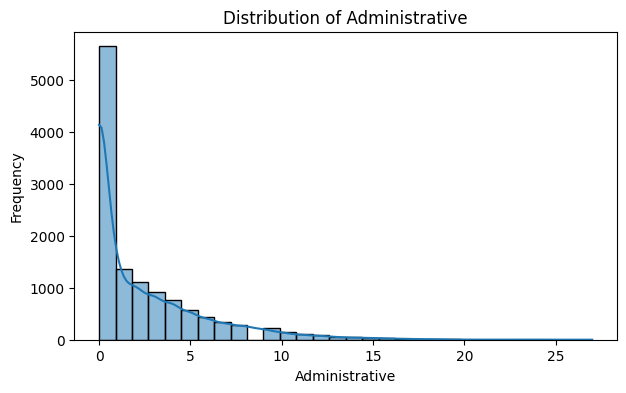

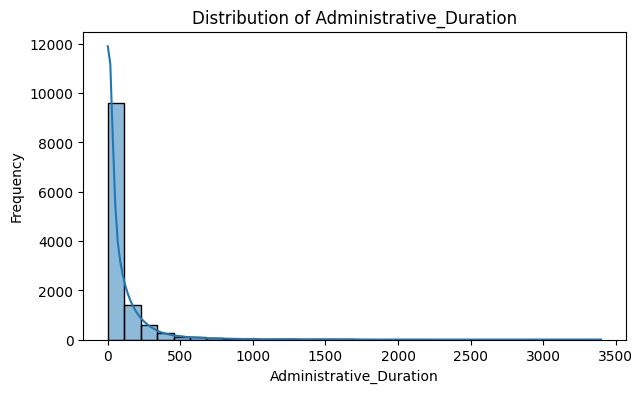

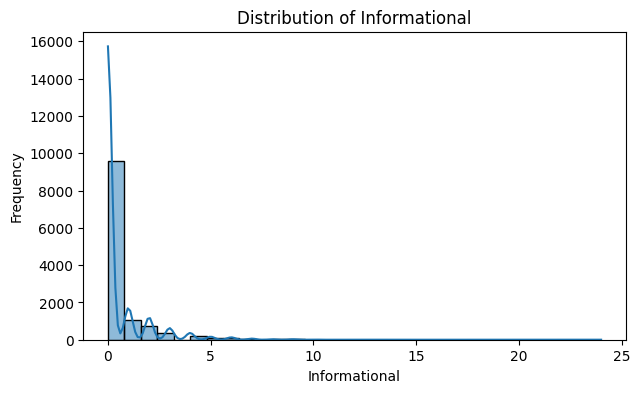

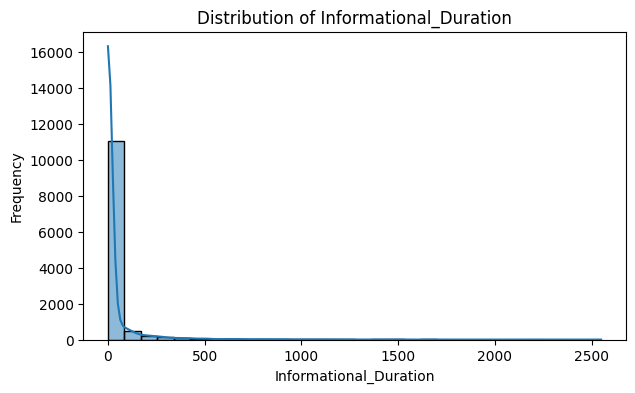

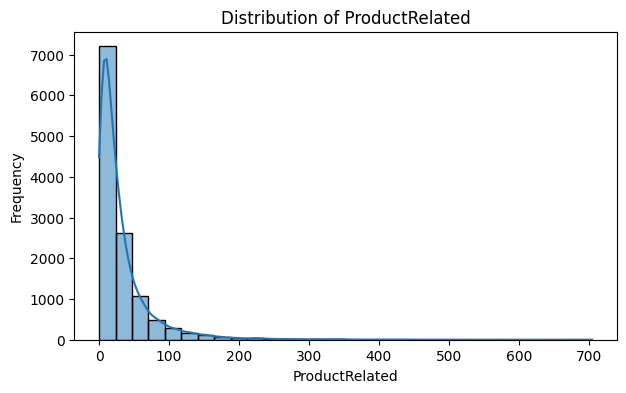

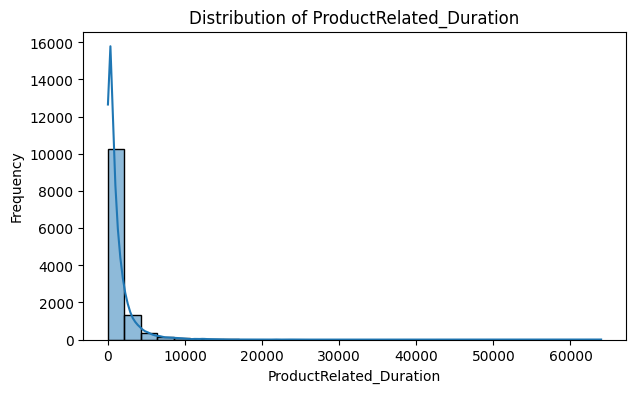

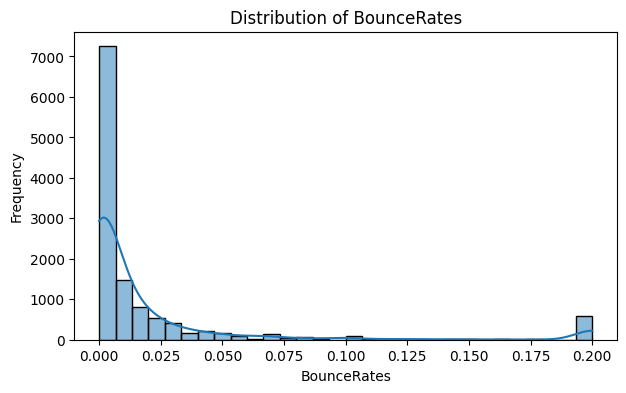

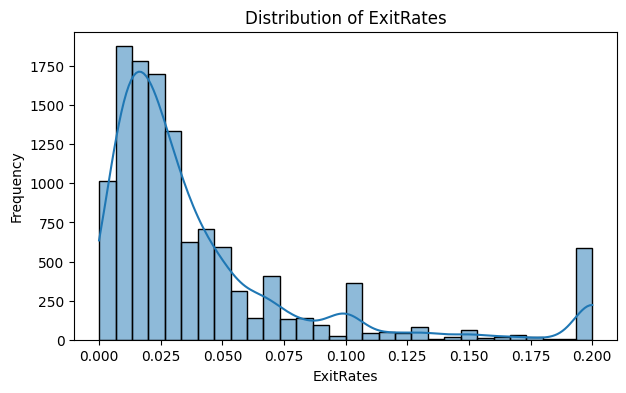

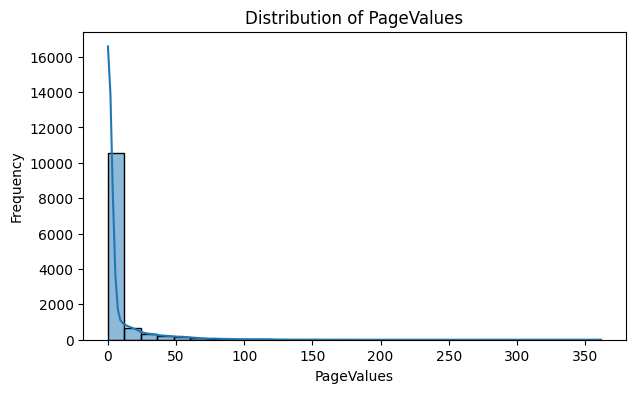

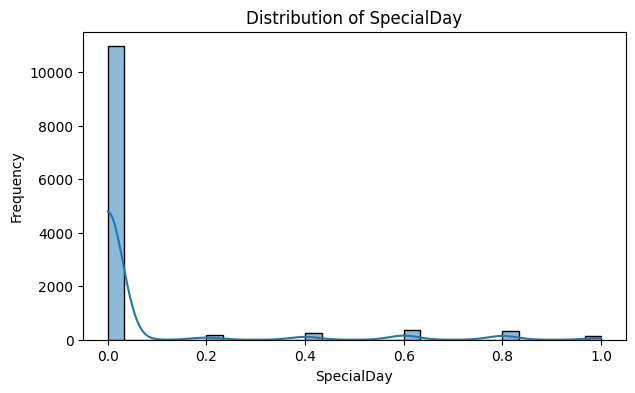

In [5]:
numerical_cols = df.select_dtypes(include=[np.number]).columns #columns which contain numerical values
print("Range, Central Tendencies and Dispersion of the Columns in the Dataset:")
for col in numerical_cols:
    print()
    print(f"{col}:")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Mode: {df[col].mode()[0]:.2f}")
    print(f"Variance: {df[col].var():.2f}")
    print(f"Standard Deviation: {df[col].std():.2f}")
    print(f"Range: {df[col].min():.2f} - {df[col].max():.2f}")

# Plotting the distribution for visualisation
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Outlier Detection

Outliers in the columns of dataset:

Administrative: 404 outliers
Sample outliers: [12, 16, 13, 11, 13]

Administrative_Duration: 1149 outliers
Sample outliers: [279.4166667, 1005.666667, 326.25, 462.0, 293.7782051]

Informational: 2631 outliers
Sample outliers: [1, 2, 1, 1, 1]

Informational_Duration: 2405 outliers
Sample outliers: [120.0, 16.0, 94.0, 93.0, 75.0]

ProductRelated: 1007 outliers
Sample outliers: [90, 128, 96, 98, 87]

ProductRelated_Duration: 951 outliers
Sample outliers: [4084.393939, 6951.972222, 5062.213753, 3556.61241, 5188.5]

BounceRates: 1428 outliers
Sample outliers: [0.2, 0.2, 0.05, 0.2, 0.2]

ExitRates: 1325 outliers
Sample outliers: [0.2, 0.1, 0.2, 0.14, 0.2]

PageValues: 2730 outliers
Sample outliers: [54.17976426, 19.44707913, 38.30849268, 22.9160357, 11.43941195]

SpecialDay: 1249 outliers
Sample outliers: [0.4, 0.8, 0.4, 0.4, 1.0]



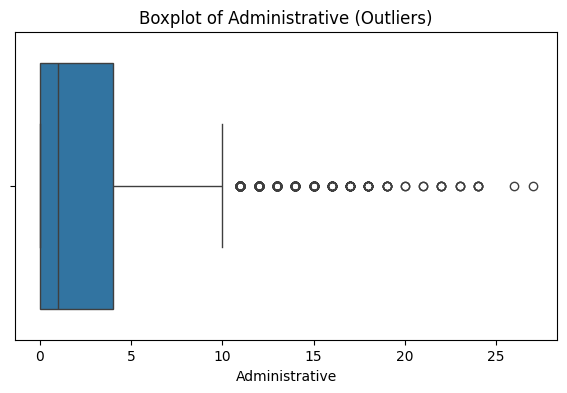

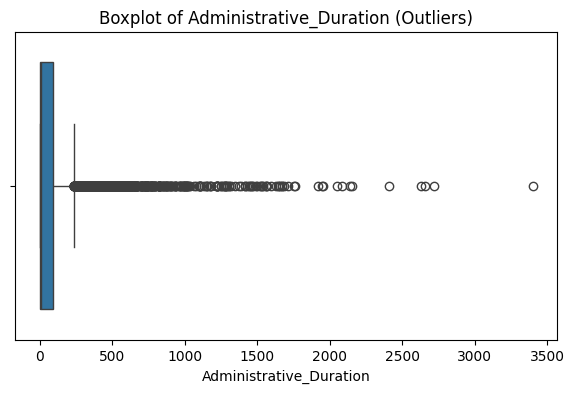

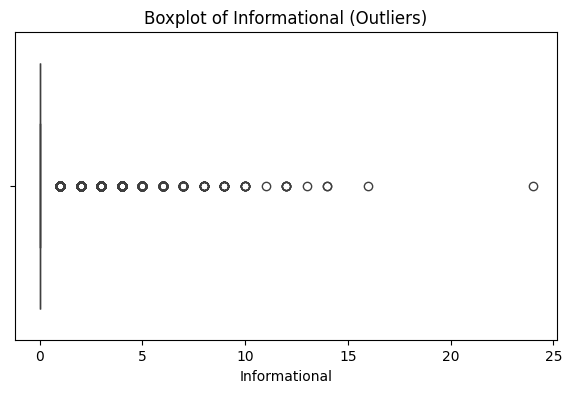

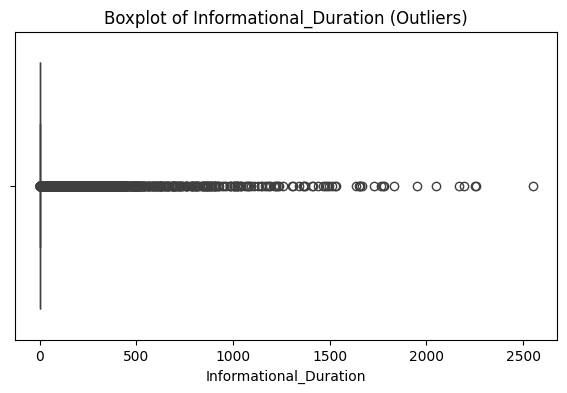

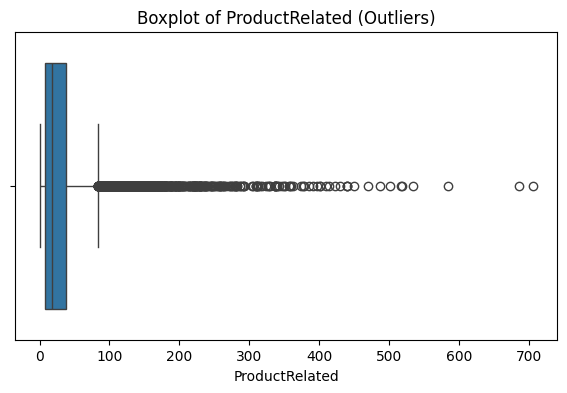

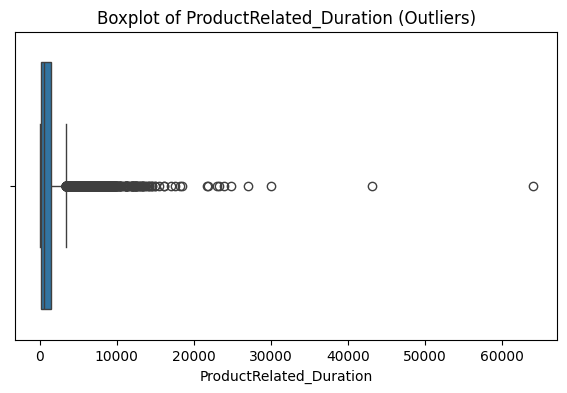

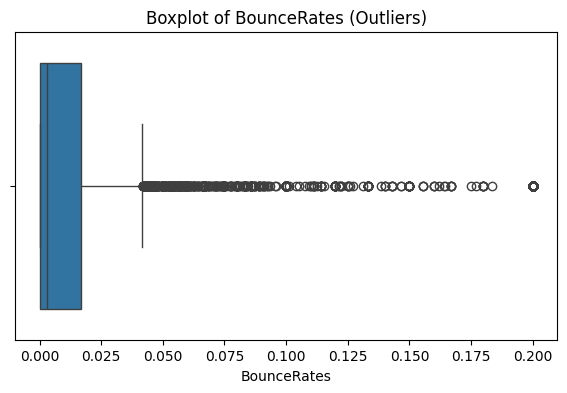

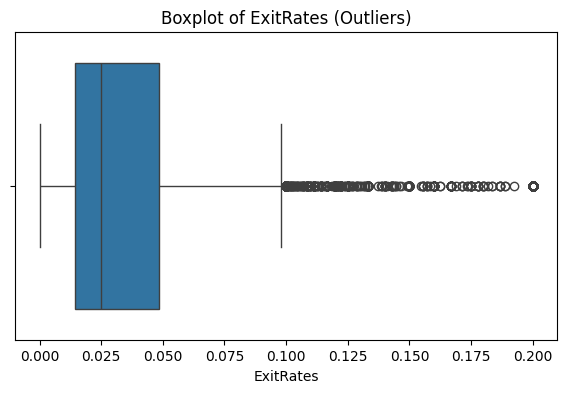

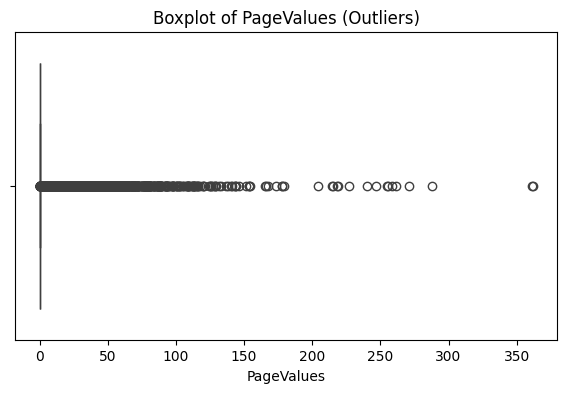

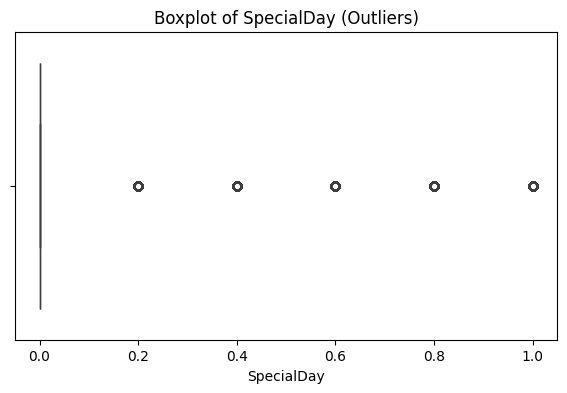

In [6]:
# Function to detect outliers
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers
print("Outliers in the columns of dataset:")
print()
for col in numerical_cols:
    outliers = detect_outliers(df, col)
    print(f"{col}: {len(outliers)} outliers")
    if not outliers.empty:
        print(f"Sample outliers: {outliers.head().tolist()}")
    print()

# Visualizing outliers with boxplots
for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (Outliers)')
    plt.show()

## Correlation Analysis


Correlation Matrix - Pearson Correlation Coefficients
                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.600457   
Administrative_Duration        0.600457                 1.000000   
Informational                  0.375256                 0.301419   
Informational_Duration         0.254813                 0.237211   
ProductRelated                 0.428305                 0.286863   
ProductRelated_Duration        0.371146                 0.353583   
BounceRates                   -0.213096                -0.136913   
ExitRates                     -0.311255                -0.201971   
PageValues                     0.097017                 0.066228   
SpecialDay                    -0.096951                -0.074666   

                         Informational  Informational_Duration  \
Administrative                0.375256                0.254813   
Administrative_Duration       0.301419                0.237211  

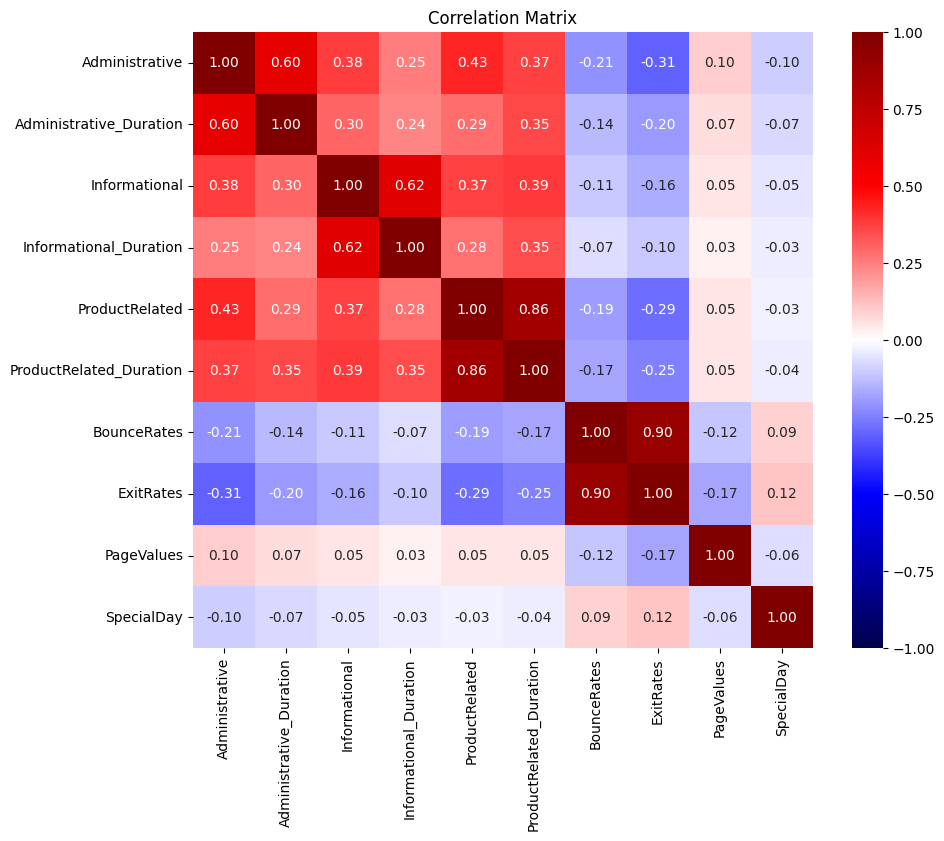

In [7]:
# Compute correlation matrix
correlation_matrix = df[numerical_cols].corr()
# note that this matrix uses pearson correlation coefficients

print("\nCorrelation Matrix - Pearson Correlation Coefficients")
print(correlation_matrix)

# Visualizing the matrix with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Summary Statistics

In [8]:
# summary for numerical data
print("\nSummary Statistics - Numerical Data:")
print(df[numerical_cols].describe())

# summary for categorical data
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
print("\nCategorical Value Counts:")
for col in categorical_cols:
    print()
    print(df[col].value_counts().to_string())


Summary Statistics - Numerical Data:
       Administrative  Administrative_Duration  Informational  \
count    12205.000000             12205.000000   12205.000000   
mean         2.338878                81.646331       0.508726   
std          3.330436               177.491845       1.275617   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 9.000000       0.000000   
75%          4.000000                94.700000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12205.000000    12205.000000             12205.000000   
mean                34.825454       32.045637              1206.982457   
std                141.424807       44.593649              1919.601400   
min                  0.000000        0.000000                 0.000000   
25%   

## Testing whether the data follows a normal distribution (Kolmogorov-Smirnov Test)

In [9]:
for col in numerical_cols:
    stat, p = kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))
    print(f"{col}: Statistic={stat:.3f}, p-value={p:.3f}")
    if p > 0.05:
        print(f"  -> Appears normally distributed\n")
    else:
        print(f"  -> Not normally distributed\n")


Administrative: Statistic=0.241, p-value=0.000
  -> Not normally distributed

Administrative_Duration: Statistic=0.323, p-value=0.000
  -> Not normally distributed

Informational: Statistic=0.439, p-value=0.000
  -> Not normally distributed

Informational_Duration: Statistic=0.403, p-value=0.000
  -> Not normally distributed

ProductRelated: Statistic=0.240, p-value=0.000
  -> Not normally distributed

ProductRelated_Duration: Statistic=0.265, p-value=0.000
  -> Not normally distributed

BounceRates: Statistic=0.326, p-value=0.000
  -> Not normally distributed

ExitRates: Statistic=0.213, p-value=0.000
  -> Not normally distributed

PageValues: Statistic=0.401, p-value=0.000
  -> Not normally distributed

SpecialDay: Statistic=0.519, p-value=0.000
  -> Not normally distributed

